# Settings

In [1]:
#install.packages("forecast")
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
source("~/works/utils/r/myutils.r")

# ARIMA

https://www.quantstart.com/articles/Autoregressive-Integrated-Moving-Average-ARIMA-p-d-q-Models-for-Time-Series-Analysis/

## Simulation, Correlogram and Model Fitting

In [4]:
new.figsize(10,6)

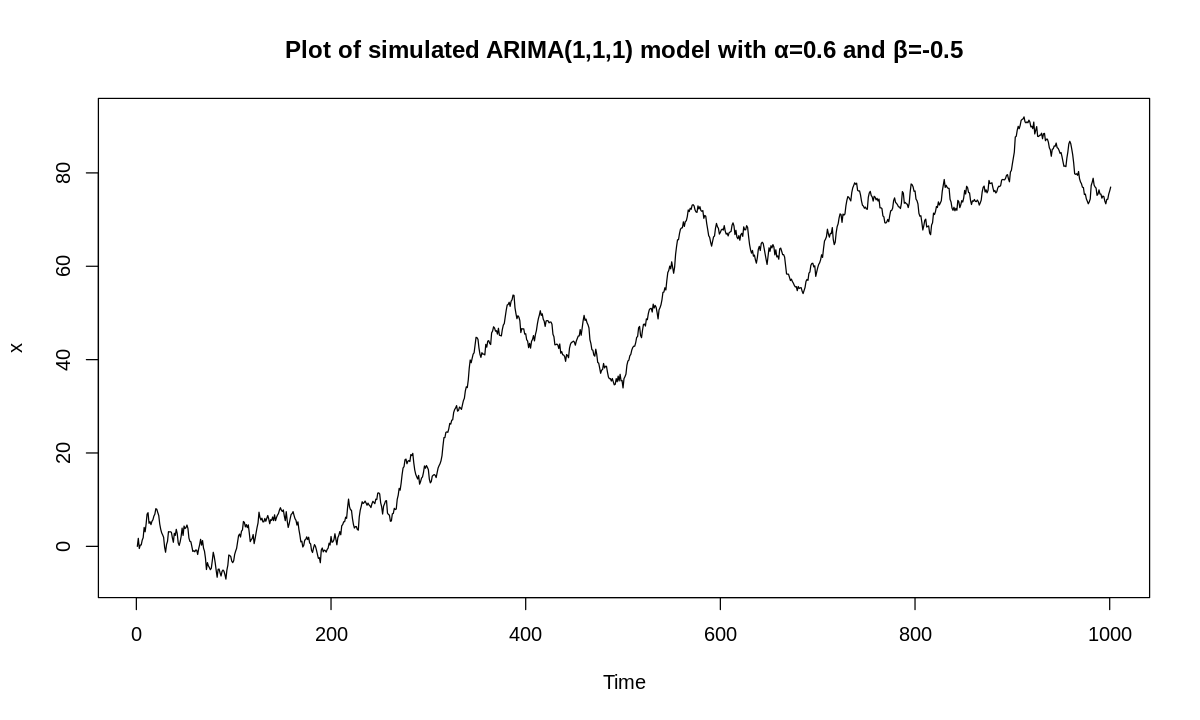

In [11]:
set.seed(2)
x <- arima.sim(list(order = c(1,1,1), ar = 0.6, ma=-0.5), n = 1000)
plot(x, 
     main='Plot of simulated ARIMA(1,1,1) model with α=0.6 and β=-0.5'
     #sub='Plot of simulated ARIMA(1,1,1) model with α=0.6 and β=-0.5'
    )

In [46]:
x.arima <- arima(x, order=c(1, 1, 1))
x.arima


Call:
arima(x = x, order = c(1, 1, 1))

Coefficients:
         ar1      ma1
      0.6470  -0.5165
s.e.  0.1065   0.1189

sigma^2 estimated as 1.027:  log likelihood = -1432.09,  aic = 2870.18

95% confidence intervals

In [91]:
#x.arima[0:20]
#typeof(x.arima$coef)
#is.atomic(x.arima$coef)

ar1 <- x.arima$coef[['ar1']]
se_ar1 <- x.arima$var.coef[1]^.5
ma1 <- x.arima$coef[['ma1']]
se_ma1 <- x.arima$var.coef[4]^.5

ar1 + c(-1.96, 1.96)*se_ar1
ma1 + c(-1.96, 1.96)*se_ma1

[1] 0.4382411 0.8558227

[1] -0.7495459 -0.2834130

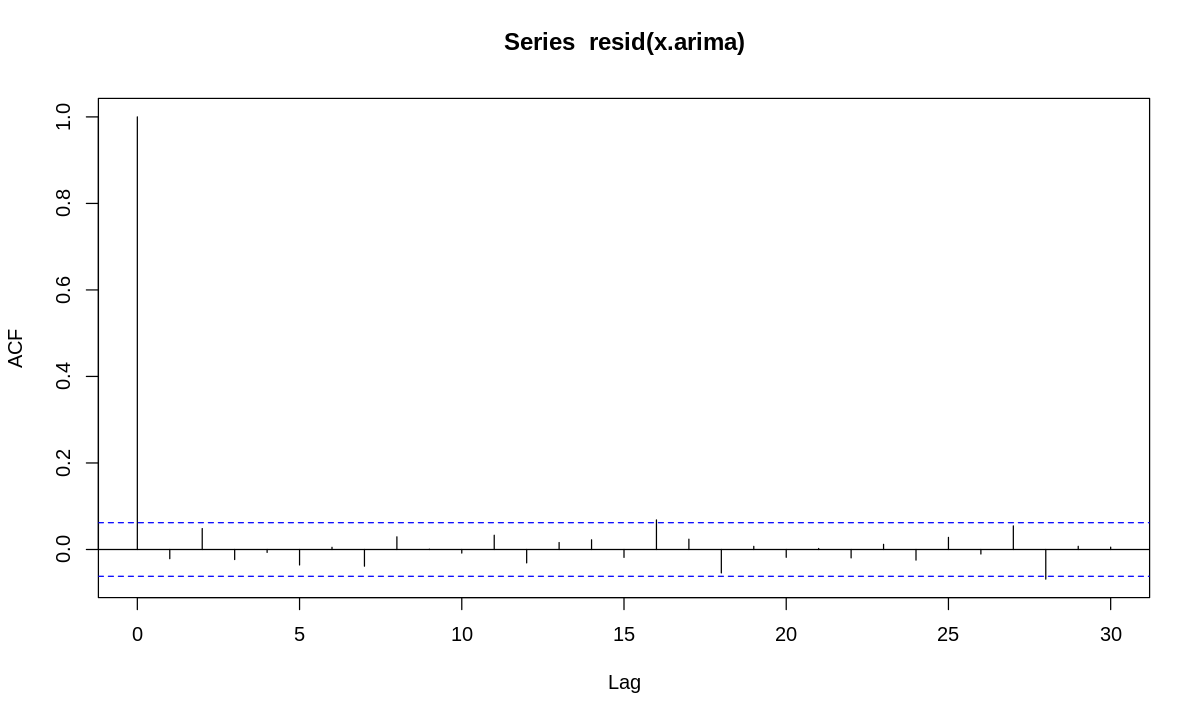

In [ ]:
acf(resid(x.arima))

In [15]:
Box.test(resid(x.arima), lag=20, type="Ljung-Box")


	Box-Ljung test

data:  resid(x.arima)
X-squared = 19.041, df = 20, p-value = 0.5191


## Financial Data and Prediction

### Amazon

In [16]:
require(quantmod)

In [100]:
getSymbols("AMZN", from="2013-01-01", to='2015-9-1')
amzn = diff(log(Cl(AMZN)))

[1] "AMZN"

In [101]:
length(amzn)

[1] 671

In [102]:
azfinal.aic <- Inf
azfinal.order <- c(0,0,0)
for (p in 1:4) for (d in 0:1) for (q in 1:4) {
    azcurrent.aic <- AIC(arima(amzn, order=c(p, d, q)))
    if (azcurrent.aic < azfinal.aic) {
        azfinal.aic <- azcurrent.aic
        azfinal.order <- c(p, d, q)
        azfinal.arima <- arima(amzn, order=azfinal.order)
    }
}

Warning message in arima(amzn, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(amzn, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(amzn, order = azfinal.order):
“possible convergence problem: optim gave code = 1”
Warning message in arima(amzn, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(amzn, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(amzn, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(amzn, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”


In [103]:
azfinal.order
azfinal.aic

[1] 3 0 3

[1] -3354.724

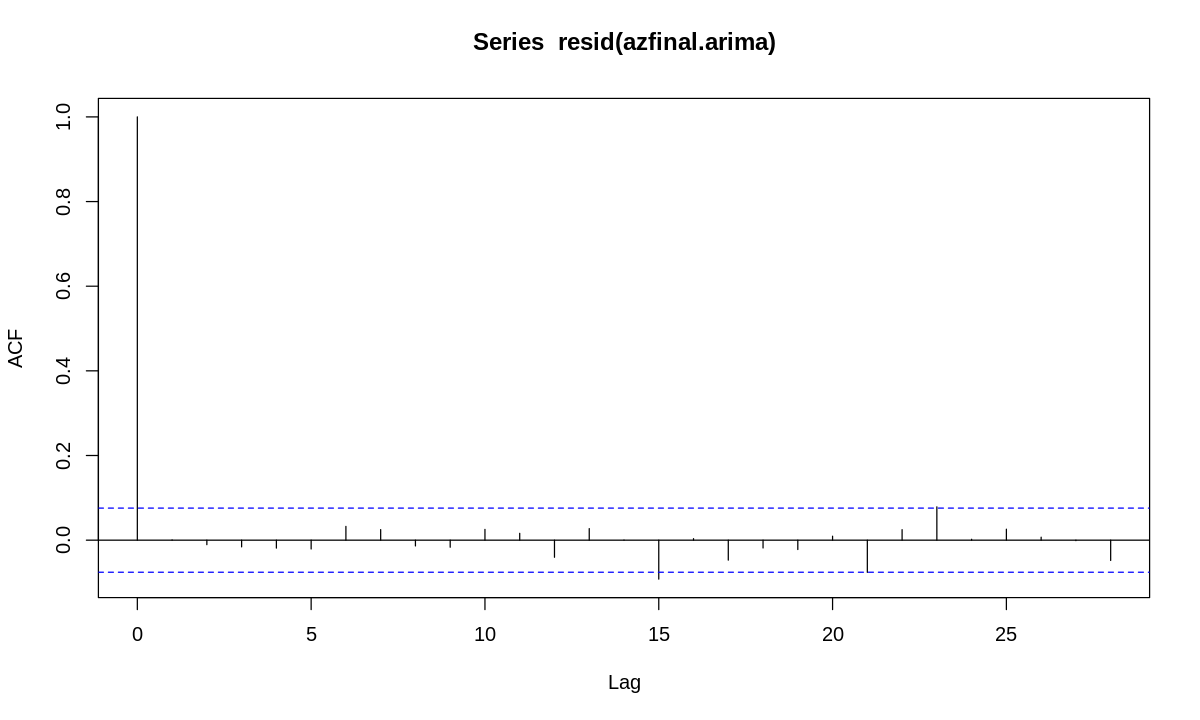

In [104]:
acf(resid(azfinal.arima), na.action=na.omit)

In [105]:
Box.test(resid(azfinal.arima), lag=20, type="Ljung-Box")


	Box-Ljung test

data:  resid(azfinal.arima)
X-squared = 12.468, df = 20, p-value = 0.899


In [108]:
new.figsize(10,8)

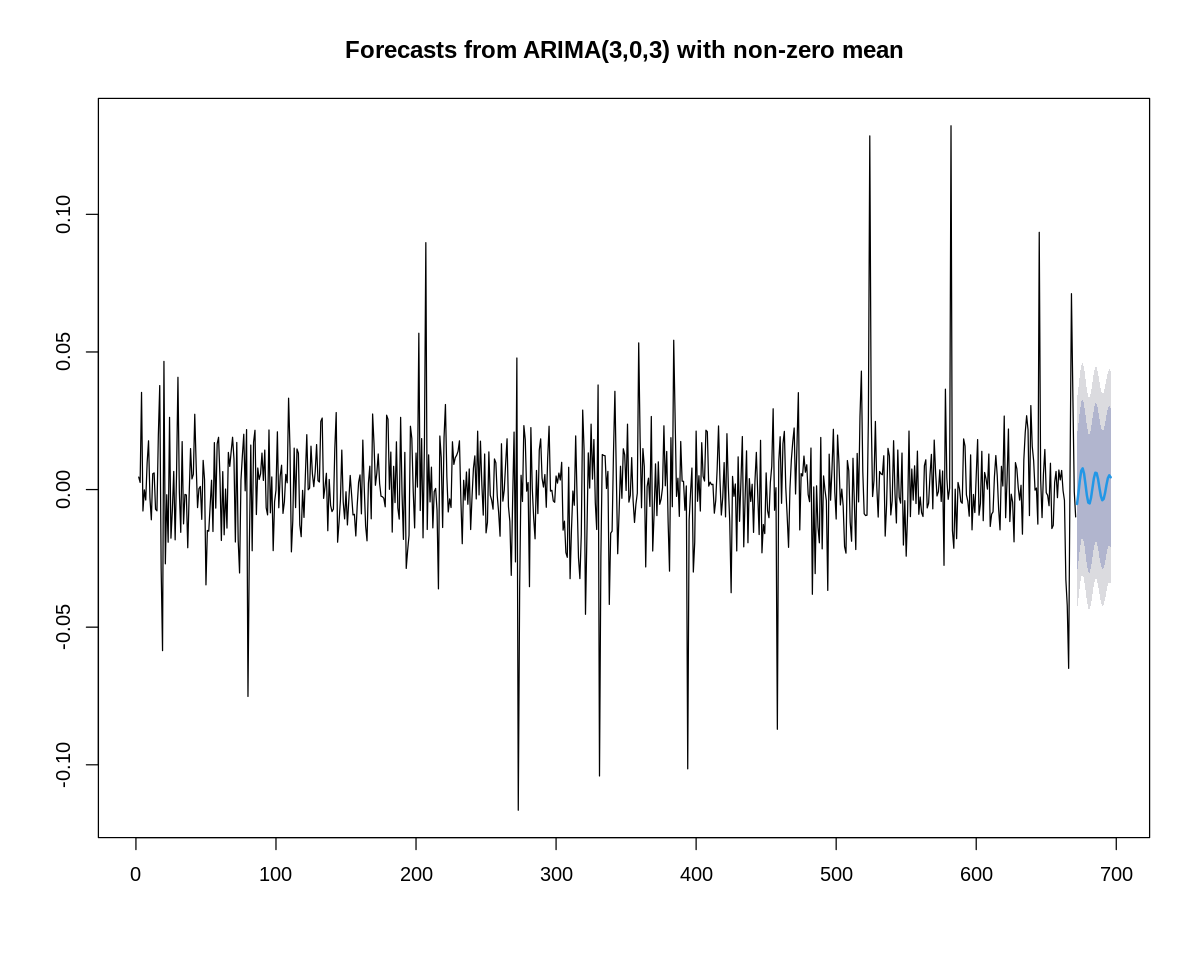

In [109]:
plot(forecast(azfinal.arima, h=25), 
     #xlim=c(2200, NA) # Error in plot.window(xlim, ylim, log, ...): need finite 'xlim' values
     #xlim=c(2200, 2450)
    )

#### auto.arima for comparison

In [110]:
aa <- auto.arima(amzn, seasonal=FALSE)
aa

Series: amzn 
ARIMA(0,0,0) with zero mean 

sigma^2 = 0.0003902:  log likelihood = 1678.64
AIC=-3355.27   AICc=-3355.26   BIC=-3350.76

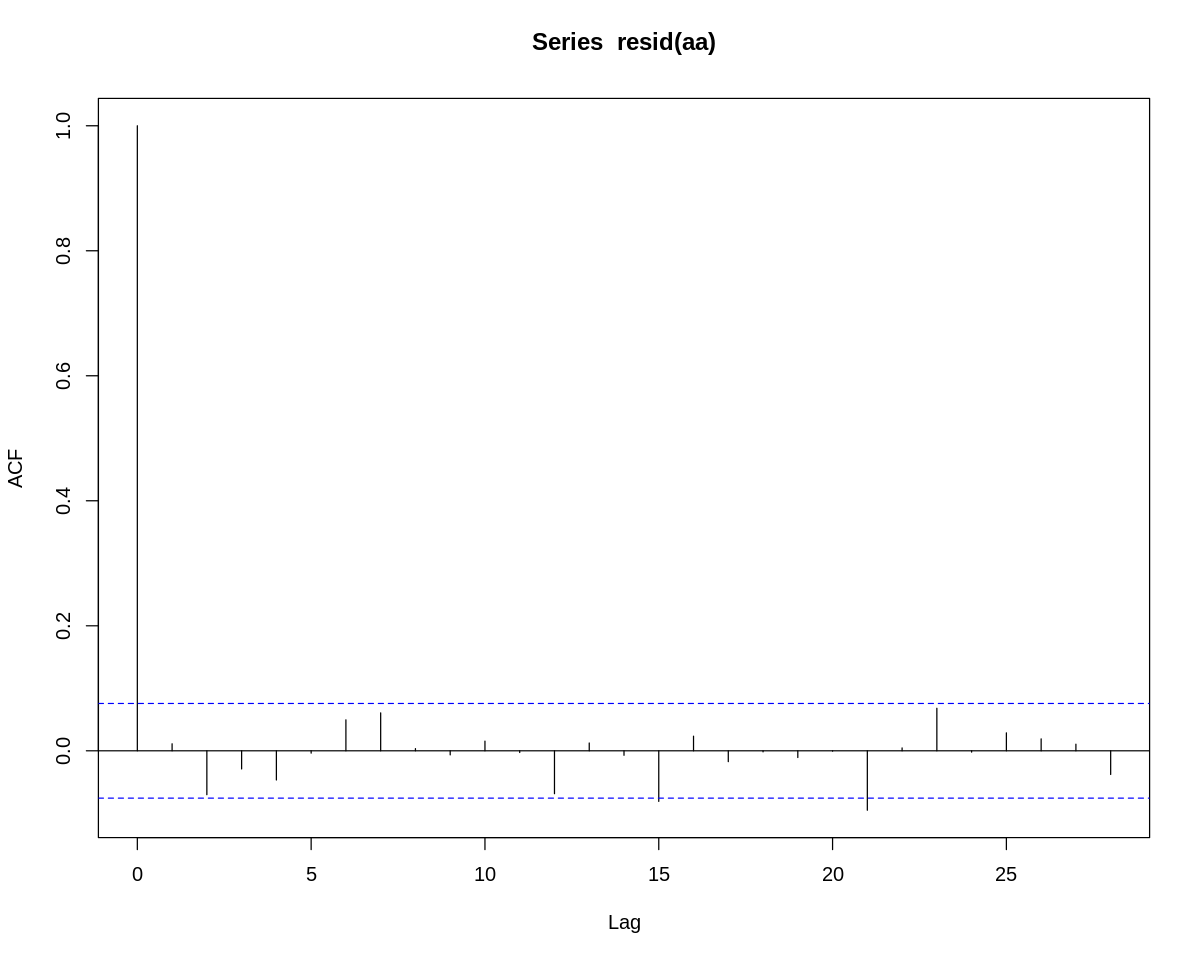

In [111]:
acf(resid(aa), na.action=na.omit)

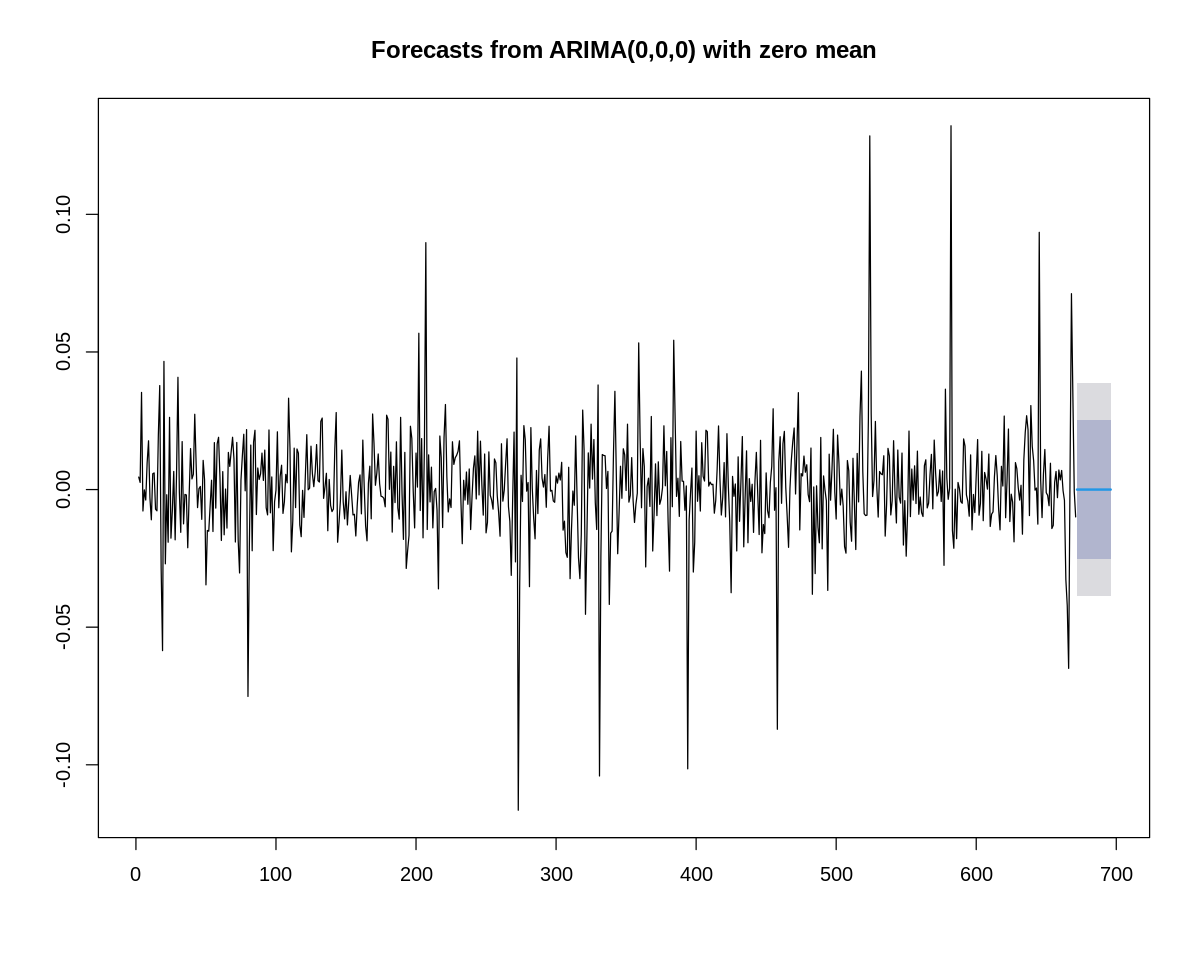

In [113]:
plot(forecast(aa, h=25), 
     #xlim=c(2200, NA) # Error in plot.window(xlim, ylim, log, ...): need finite 'xlim' values
     #xlim=c(2200, 2450)
    )

### S&P500

In [114]:
getSymbols("^GSPC", from="2013-01-01", to="2015-09-01")
sp = diff(log(Cl(GSPC)))

[1] "^GSPC"

In [115]:
spfinal.aic <- Inf
spfinal.order <- c(0,0,0)
for (p in 1:4) for (d in 0:1) for (q in 1:4) {
    spcurrent.aic <- AIC(arima(sp, order=c(p, d, q)))
    if (spcurrent.aic < spfinal.aic) {
        spfinal.aic <- spcurrent.aic
        spfinal.order <- c(p, d, q)
        spfinal.arima <- arima(sp, order=spfinal.order)
    }
}

Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in arima(sp, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”


In [116]:
spfinal.order

[1] 2 0 1

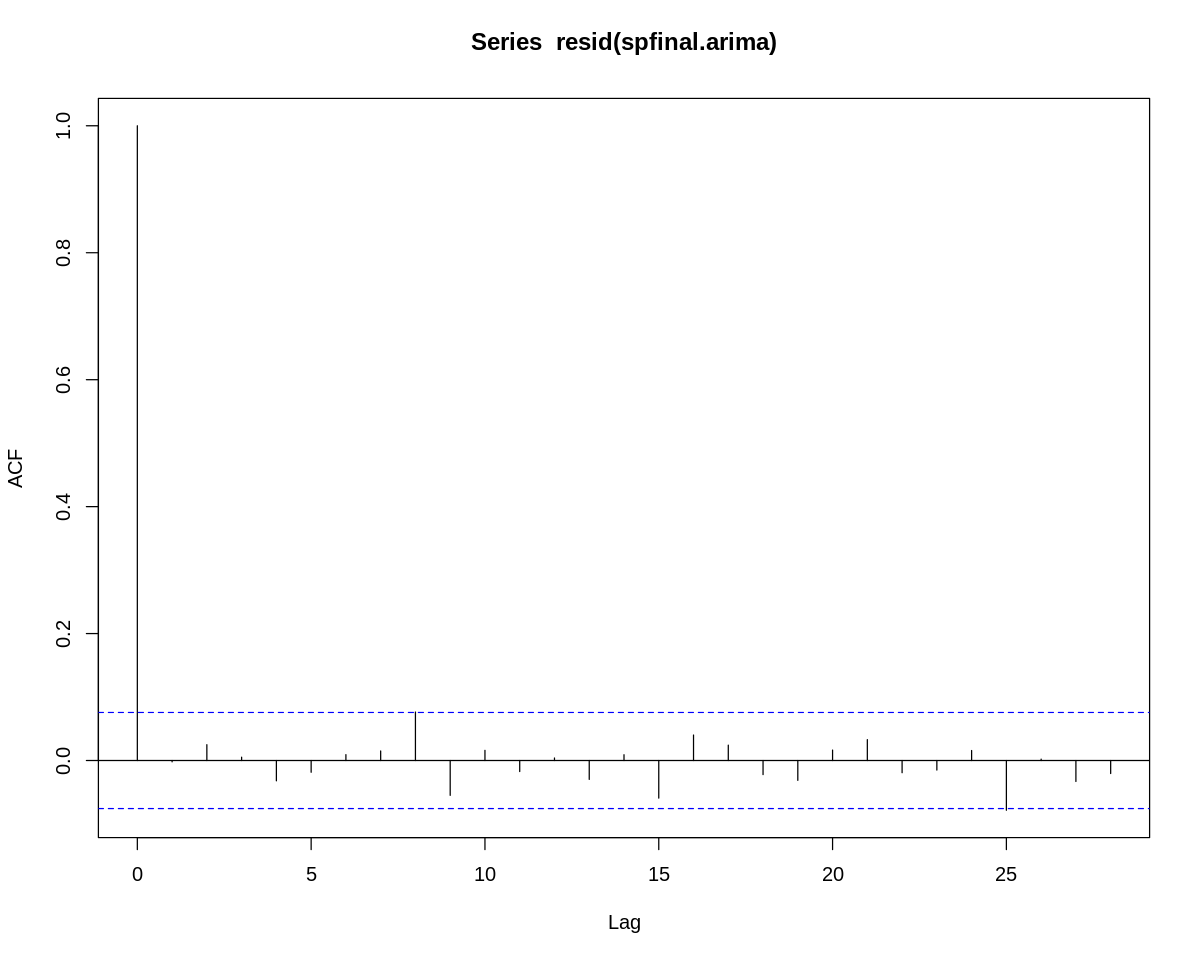

In [117]:
acf(resid(spfinal.arima), na.action=na.omit)

In [118]:
Box.test(resid(spfinal.arima), lag=20, type="Ljung-Box")


	Box-Ljung test

data:  resid(spfinal.arima)
X-squared = 13.77, df = 20, p-value = 0.842


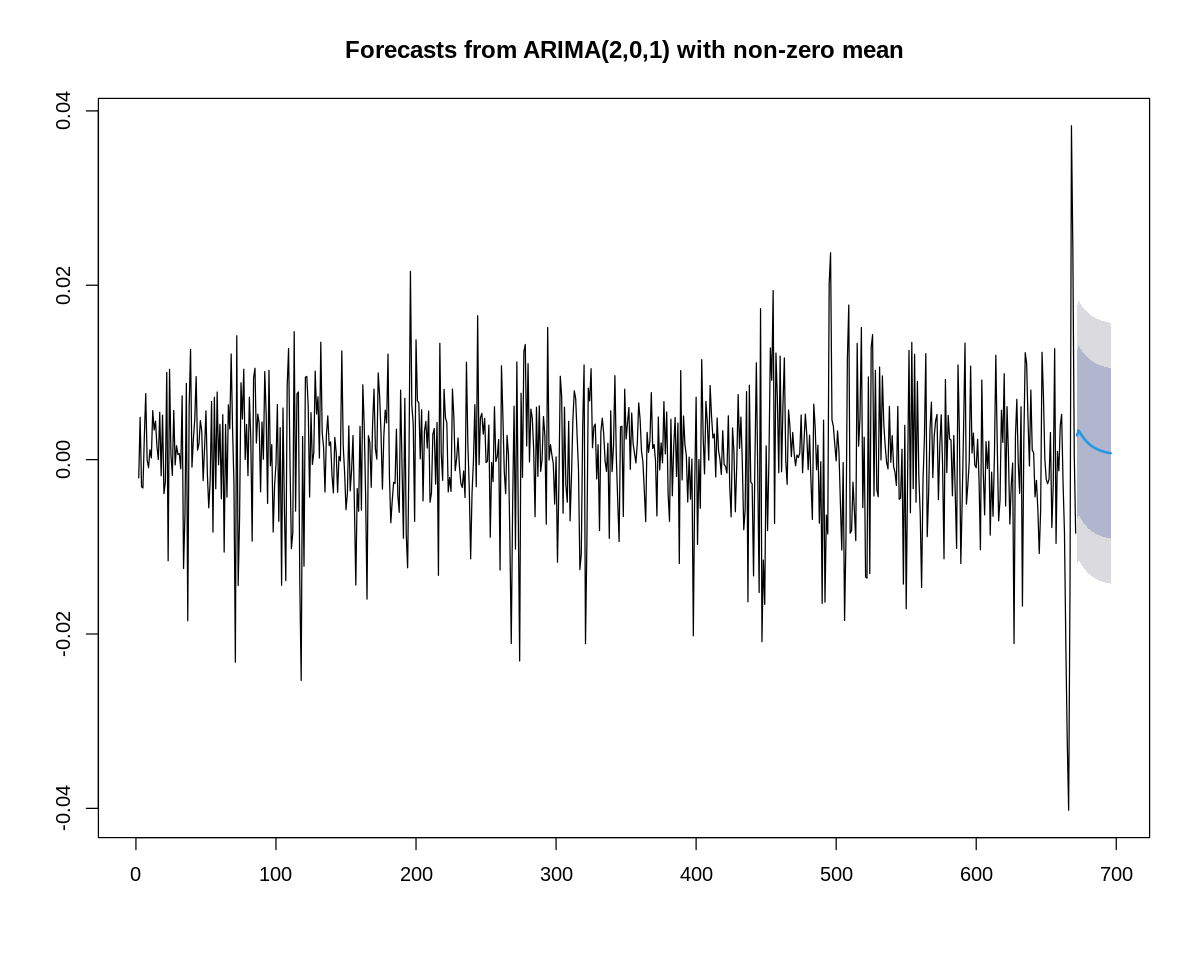

In [119]:
plot(forecast(spfinal.arima, h=25))

# GARCH

https://www.quantstart.com/articles/Generalised-Autoregressive-Conditional-Heteroskedasticity-GARCH-p-q-Models-for-Time-Series-Analysis/

## Simulations, Correlograms and Model Fittings

In [120]:
set.seed(2)
a0 <- 0.2
a1 <- 0.5
b1 <- 0.3
w <- rnorm(10000)
eps <- rep(0, 10000)
sigsq <- rep(0, 10000)
for (i in 2:10000) {
    sigsq[i] <- a0 + a1 * (eps[i-1]^2) + b1 * sigsq[i-1]
    eps[i] <- w[i]*sqrt(sigsq[i])
}

In [124]:
new.figsize(10,6)

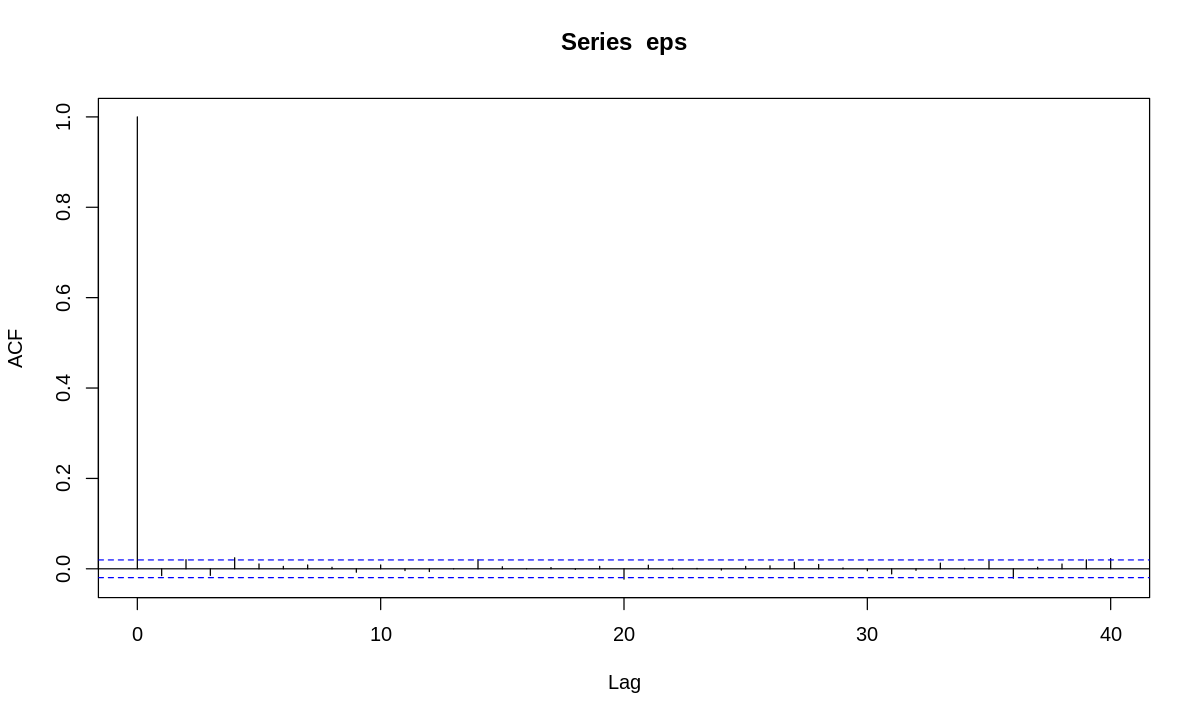

In [125]:
acf(eps)

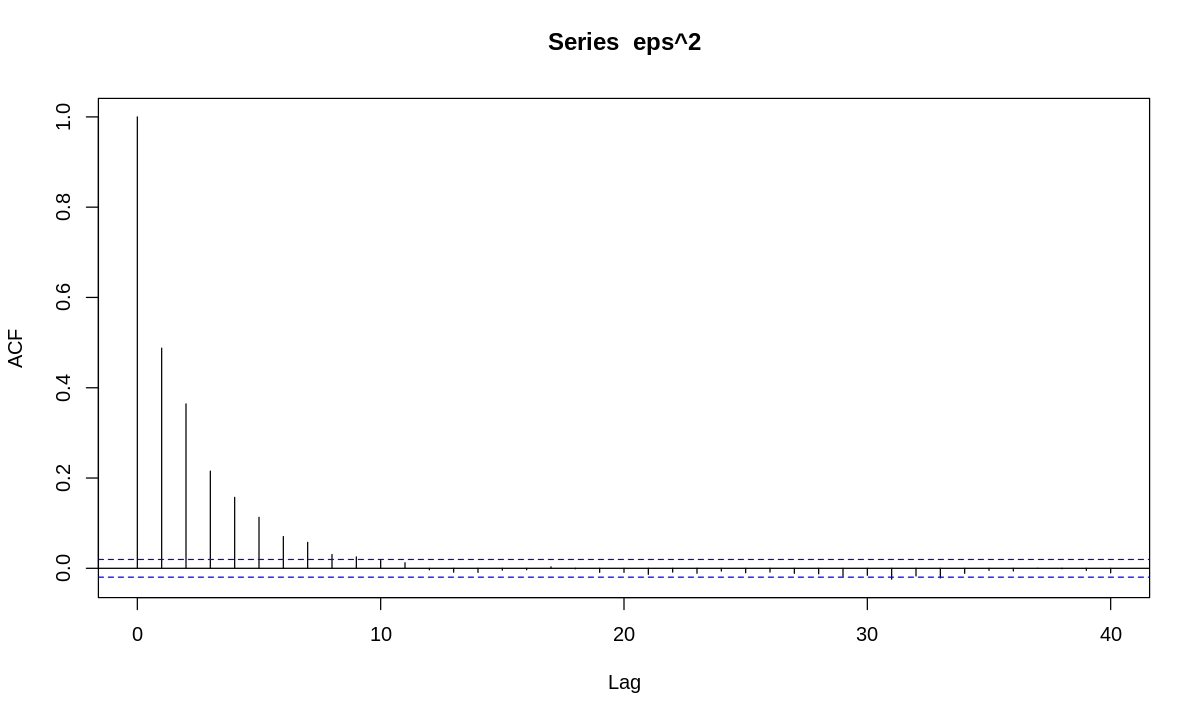

In [126]:
acf(eps^2)

In [127]:
require(tseries)

Loading required package: tseries



In [128]:
eps.garch <- garch(eps, trace=FALSE)
confint(eps.garch)

,2.5 %,97.5 %
a0,0.1786255,0.2172683
a1,0.4271900,0.5044903
b1,0.2861566,0.3602687


## Financial Data
- FTSE 100 index of the largest UK companies by market capitalisation

In [133]:
require(quantmod)
getSymbols("^FTSE", to="2015-09-01")

Warning message:
“^FTSE contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "^FTSE"

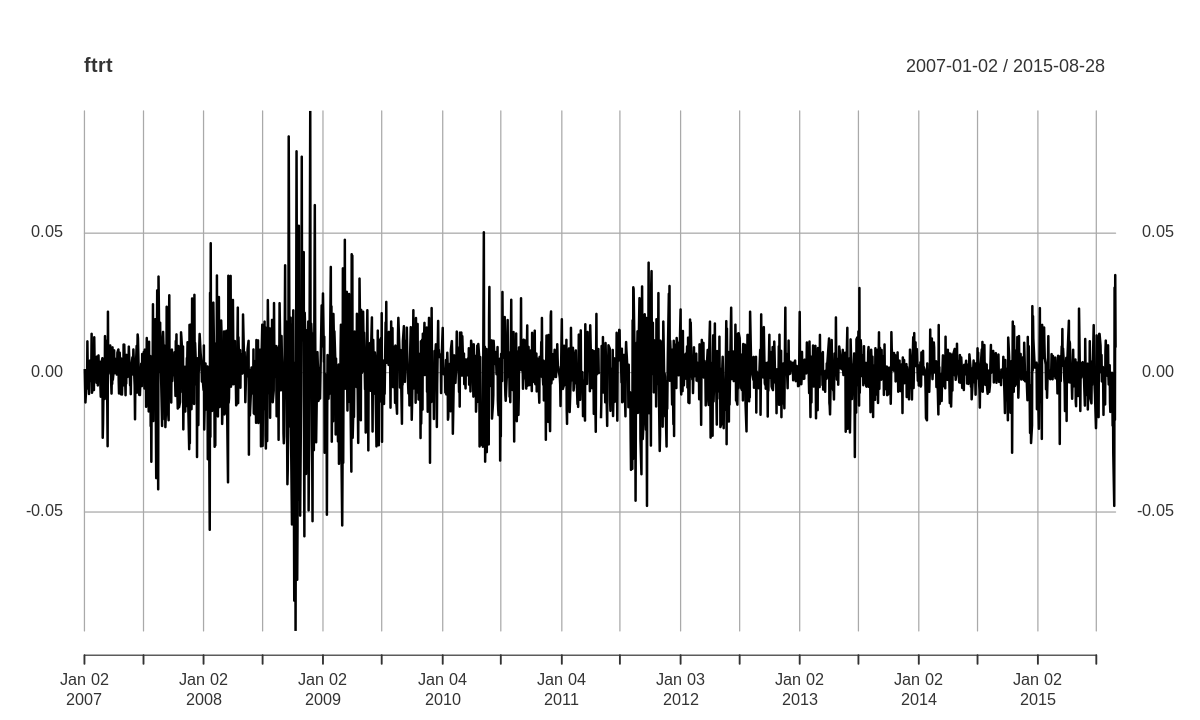

In [134]:
ftrt = diff(log(Cl(FTSE)))
plot(ftrt)

In [135]:
ft <- as.numeric(ftrt)
ft <- ft[!is.na(ft)]

In [136]:
ftfinal.aic <- Inf
ftfinal.order <- c(0,0,0)
for (p in 1:4) for (d in 0:1) for (q in 1:4) {
    ftcurrent.aic <- AIC(arima(ft, order=c(p, d, q)))
    if (ftcurrent.aic < ftfinal.aic) {
        ftfinal.aic <- ftcurrent.aic
        ftfinal.order <- c(p, d, q)
        ftfinal.arima <- arima(ft, order=ftfinal.order)
    }
}

Warning message in arima(ft, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(ft, order = ftfinal.order):
“possible convergence problem: optim gave code = 1”


In [137]:
ftfinal.order

[1] 4 0 4

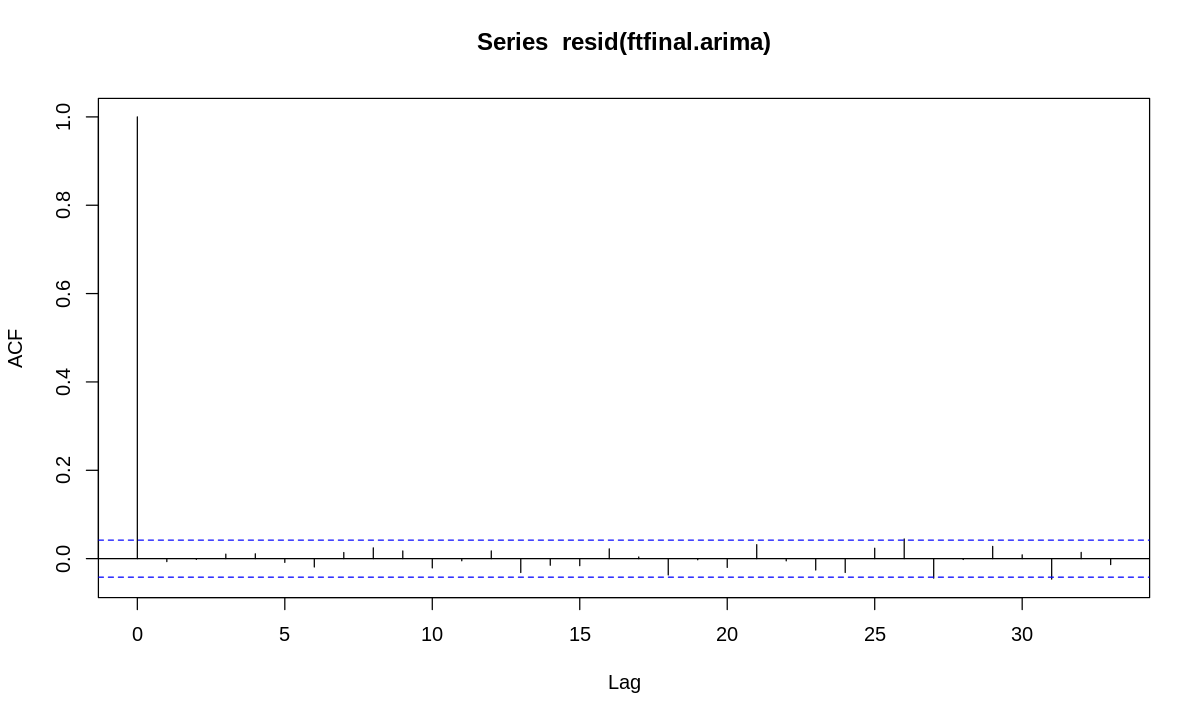

In [138]:
acf(resid(ftfinal.arima))

conditional heteroskedastic behaviour is present in the diff log return series of the FTSE100.

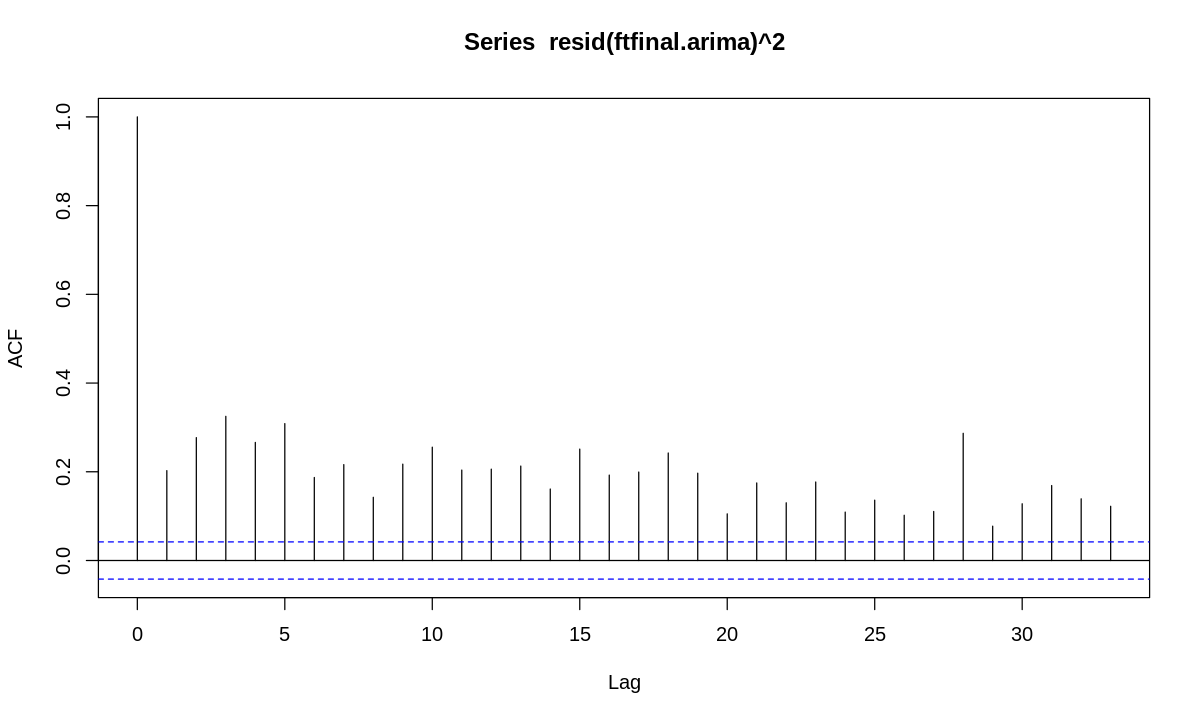

In [139]:
acf(resid(ftfinal.arima)^2)

In [140]:
ft.garch <- garch(ft, trace=F)
ft.res <- ft.garch$res[-1]

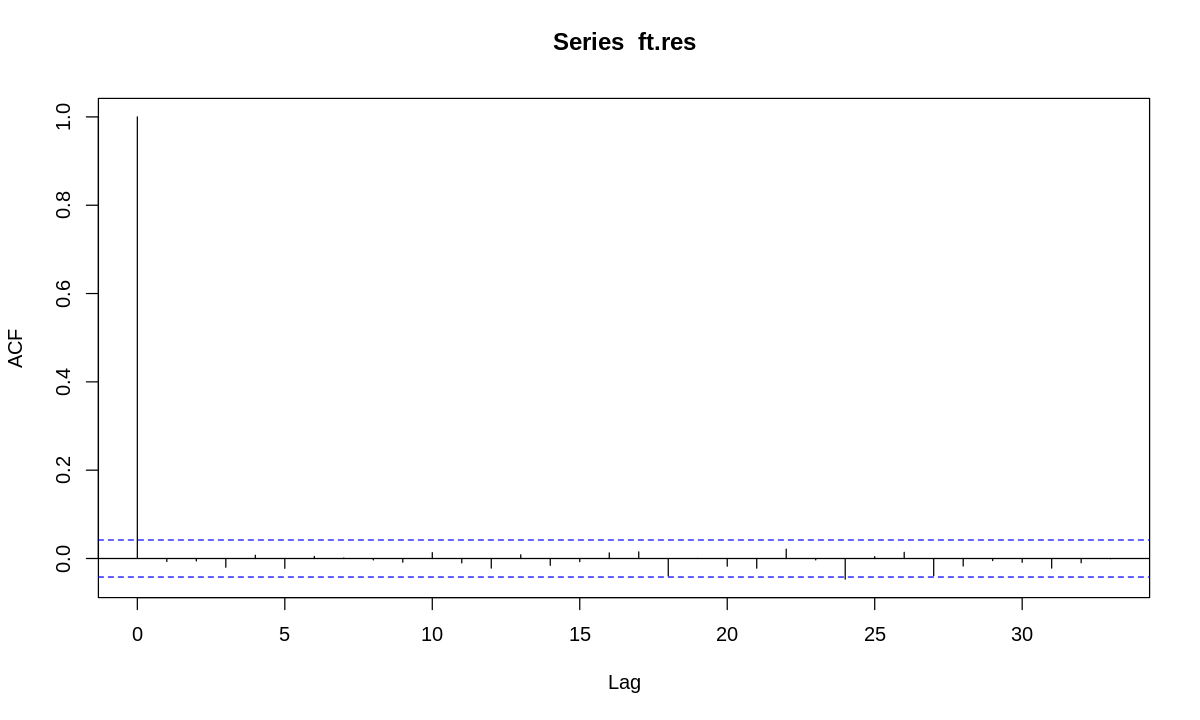

In [141]:
acf(ft.res)

Once again, we have what looks like a realisation of a discrete white noise process, indicating that we have "explained" the serial correlation present in the squared residuals with an appropriate mixture of ARIMA(p,d,q) and GARCH(p,q).

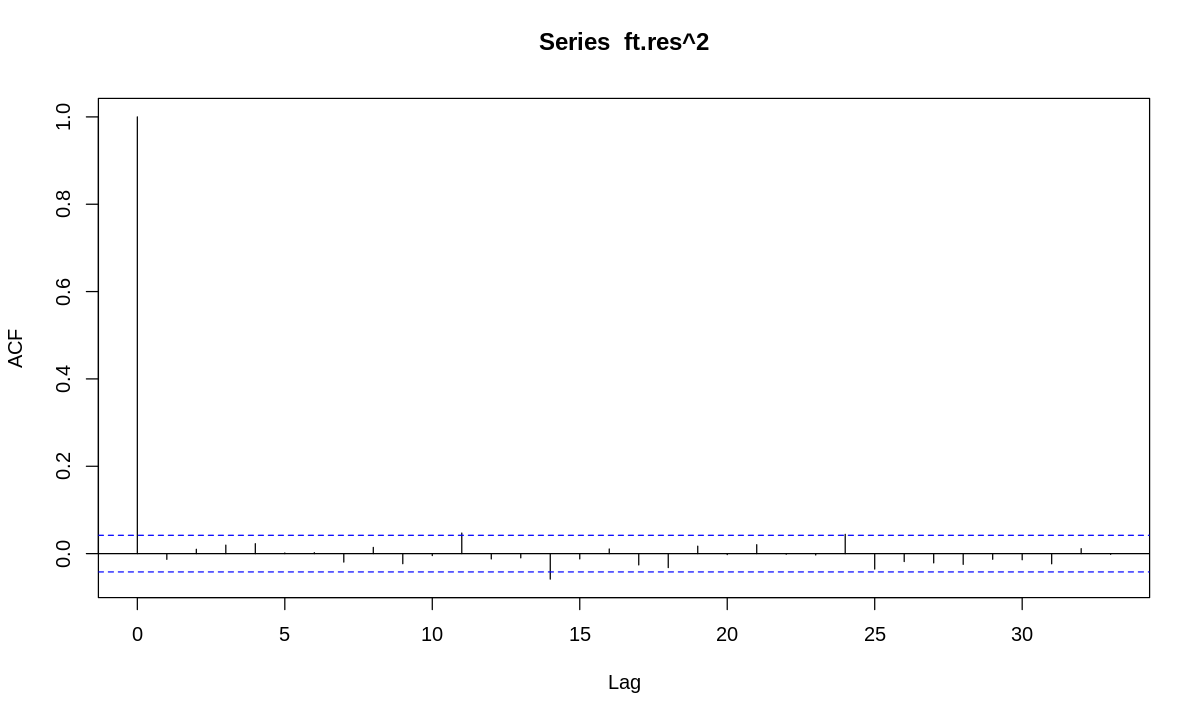

In [142]:
acf(ft.res^2)

# ARIMA + GARCH Strategy

https://www.quantstart.com/articles/ARIMA-GARCH-Trading-Strategy-on-the-SP500-Stock-Market-Index-Using-R/

## Settings

In [4]:
#install.packages("timeSeries")
#install.packages("rugarch")

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’




In [3]:
library(quantmod)
library(lattice)
library(timeSeries)
library(rugarch)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Loading required package: timeDate


Attaching package: ‘timeSeries’


The following object is masked from ‘package:zoo’:

    time<-


Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma




In [20]:
library(ggplot2)
library(scales)


In [5]:
library(forecast)

### User's

In [6]:
ag.forecast <- function(ret, foreLength, windowLength, lookahead) {

    # Create vectors to store the predictions
    fc.pred <- vector(mode="numeric", length=foreLength)
    fc.sigma <- vector(mode="numeric", length=foreLength)
    fc.dates <- vector(mode="character", length=foreLength)
    
    # step to print output
    print.step <- round((foreLength+1)/5)

    start_time <- Sys.time()

    for (d in 1:(foreLength+1)) {

        # Obtain the S&P500 rolling window for this day
        retOffset <- ret[d:(windowLength+d)]

        # Fit the ARIMA model
        fit <- tryCatch(auto.arima(retOffset, seasonal=FALSE, 
                                   ic='aicc', 
                                   #ic='aic', 
                                   d=0, 
                                   trace=FALSE),
                        error=function(err) {FALSE},
                        warning=function(err) {FALSE} )

        if( !is.logical(fit) ) {
            final.order <- as.numeric(arimaorder(fit))
        } else {
            final.order <- c(0,0,0)
        }

        # Specify and fit the GARCH model
        spec <- ugarchspec(
            variance.model=list(garchOrder=c(1,1)),
            mean.model=list(armaOrder=c(final.order[1], final.order[3]), include.mean=T),
            distribution.model="sged"
        )
        fit <- tryCatch(ugarchfit(spec, retOffset, solver='hybrid'), 
                        error=function(e) {e}, 
                        warning=function(w) {w})

        # If the GARCH model does not converge, set the direction to "long" else
        # choose the correct forecast direction based on the returns prediction
        # Output the results to the screen and the forecasts vector
        if(is(fit, "warning")) {
            fc.pred[d] <- 0 # assume zero return
            fc.sigma[d] <- 0
            fc.dates[d] <- as.character(index(tail(retOffset, 1)[1]))
        } else {
            fore <- ugarchforecast(fit, n.ahead=1)
            ind <- fore@forecast$seriesFor
            sig <- fore@forecast$sigmaFor
            # save d + lookahead prediction at d date
            fc.pred[d] <- ind[1]
            fc.sigma[d] <- sig[1]
            fc.dates[d] <- colnames(ind)
        }

        if ((d %% print.step == 0) | (d == foreLength+1)) {
            a <- Sys.time() - start_time
            u <- attr(a, "units")
            v <- as.numeric(a)
            print(sprintf("%0.0f %% done (%0.0f %s).", 100 * d/(foreLength+1), v, u))
        }
    }

    pred <- xts(cbind(fc.pred, fc.sigma), order.by=as.Date(fc.dates, "%Y-%m-%d"))
    colnames(pred) <- c(paste('series T+', lookahead, sep=''), paste('sigma T+', lookahead, sep=''))
    return(pred)
}


ag.plotforecast <- function(pred, trueCurve, lookahead, 
                            label='S&P 500', n_sigma=2) 
{
    trueCurve <- trueCurve[index(pred)]
    predSer <- pred[,1]
    predSig <- pred[,2]

    getPrice <- function(x) exp(x) * trueCurve # calc returns
    z <- getPrice(predSer)
    zup <- getPrice(predSer + n_sigma*predSig)
    zdn <- getPrice(predSer - n_sigma*predSig)

    # merge forecast & true values
    result <- merge(z, zup)
    result <- merge(result, zdn)
    result <- lag(result, lookahead) # shift prediction by lookahead
    result <- merge(result, trueCurve, all=T)
    result <- result[!is.na(result[,1])]
    colnames(result) <- c('Z', 'Zup', 'Zdn', 'price')

    # plot
    labelPr <- label
    labelFc <- paste("Forecast w/ conditional ", n_sigma, "-sigma bands", sep="")
    num_lines <- 2
    gg <- (ggplot(result, aes(Index, Z))
             + geom_line(aes(color=labelFc), size = 1)
             + geom_ribbon(aes(ymin = Zdn, ymax = Zup), fill=hue_pal()(num_lines)[1], alpha=0.1)
             + geom_line(aes(y=price, color=labelPr), size = 1)
             + ylab('Index') + xlab("")
             + theme(legend.position="bottom", legend.title=element_blank())
             + guides(color=guide_legend(nrow=num_lines))
    )
    return(gg)
}


ag.backtest <- function(pred, ret, lookahead) {
    if (dim(pred)[2]>1) stop("dim of pred is invalid.")
    
    # shift prediction to its realized day before merge with ret
    position <- lag(pred, lookahead)
    position <- pred[!is.na(position)]
    # define position
    position <- ifelse(position < 0, -1, ifelse(position > 0, 1, 0))
    # merge position with ret
    position <- merge(position, ret, all=F )
    # calc result of position
    result <- position[,1] * position[,2]

    # Create the backtests for ARIMA+GARCH and Buy & Hold
    # assuming reinvestment of returns at every day
    # remember return is logarithmic one
    resArimaGarchCurve = cumsum(result)
    resBuyHoldCurve = cumsum(position[,2])
    
    resCombinedCurve = merge(resArimaGarchCurve, resBuyHoldCurve, all=F )

    # Plot the equity curves
    xyp <- ag.plot(resCombinedCurve, labels=c("ARIMA+GARCH", "Buy & Hold"))
    return(xyp)
}


ag.plot <- function(data, 
                    labels=c("ARIMA+GARCH", "Buy & Hold"),
                    colors=c("darkred", "darkblue")) {
    xyp <- xyplot( 
        data,
        superpose=T,
        col=colors,
        lwd=2,
        key=list(
            text=list(labels),
            lines=list(lwd=2, col=colors)
        )
    )
    return(xyp)
}

## Daily Log Return

Obtain the S&P500 returns

In [5]:
start <- "1991-01-01"
end <- "2020-12-31"

getSymbols("^GSPC", from=start, to=end)
spReturns = diff(log(Cl(GSPC)))

[1] "^GSPC"

In [6]:
spReturns[as.character(head(index(Cl(GSPC)),1))]

spReturns[as.character(head(index(Cl(GSPC)),1))] = 0

length(spReturns)

           GSPC.Close
1991-01-02         NA

[1] 7558

Set dates for fitting & backtesting

In [13]:
# for backtesting
#bt.start <- "2019-01-01"
#bt.end <- "2019-12-31"
#bt.start <- "2018-01-01"
bt.start <- "2018-12-01"
bt.end <- "2018-12-31"

YEAR <- 252
windowLength <- 5*YEAR # for fitting

# calc foreLength
ret <- window(spReturns, end=bt.end)
foreLength <- nrow(window(ret, start=bt.start)) 

# finalize data for fitting & backtesting
l <- nrow(ret)
ret <- ret[(l-windowLength-foreLength):l]

In [14]:
pred <- ag.forecast(ret, foreLength, windowLength, lookahead=1)

[1] "20 % done (17 secs)."
[1] "40 % done (36 secs)."
[1] "60 % done (53 secs)."
[1] "80 % done (1 mins)."
[1] "100 % done (1 mins)."


In [15]:
my.figsize(10,6)

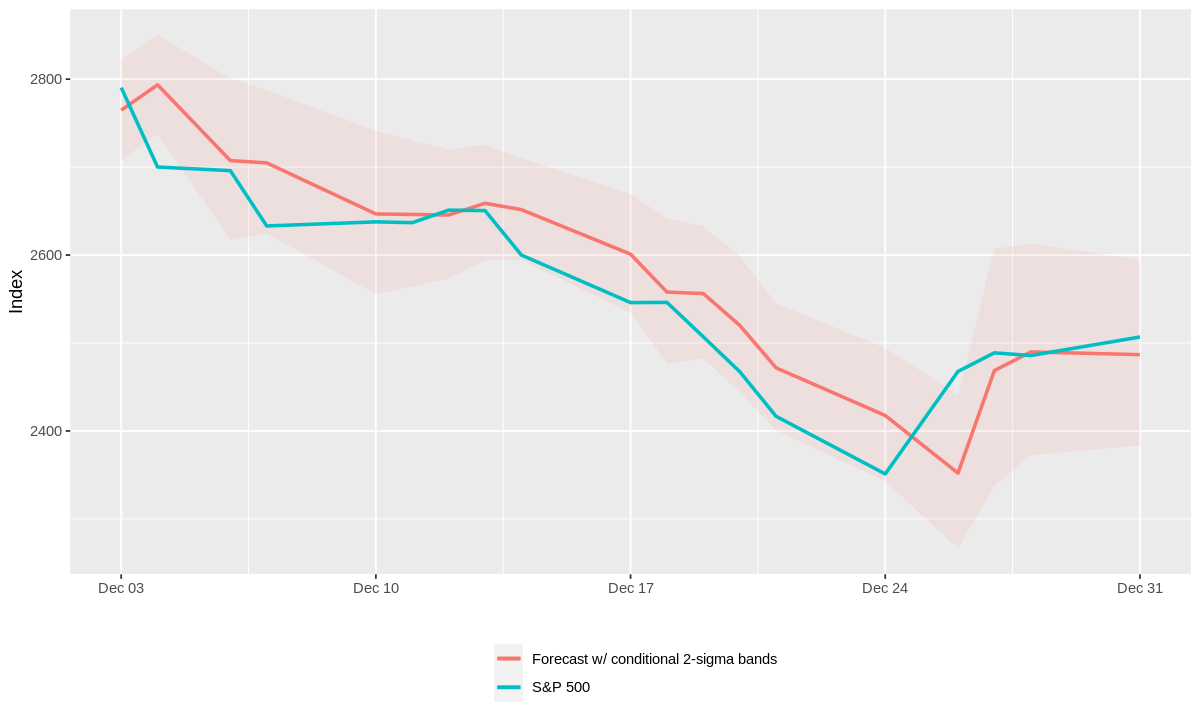

In [157]:
ag.plotforecast(pred, Cl(GSPC), 1)

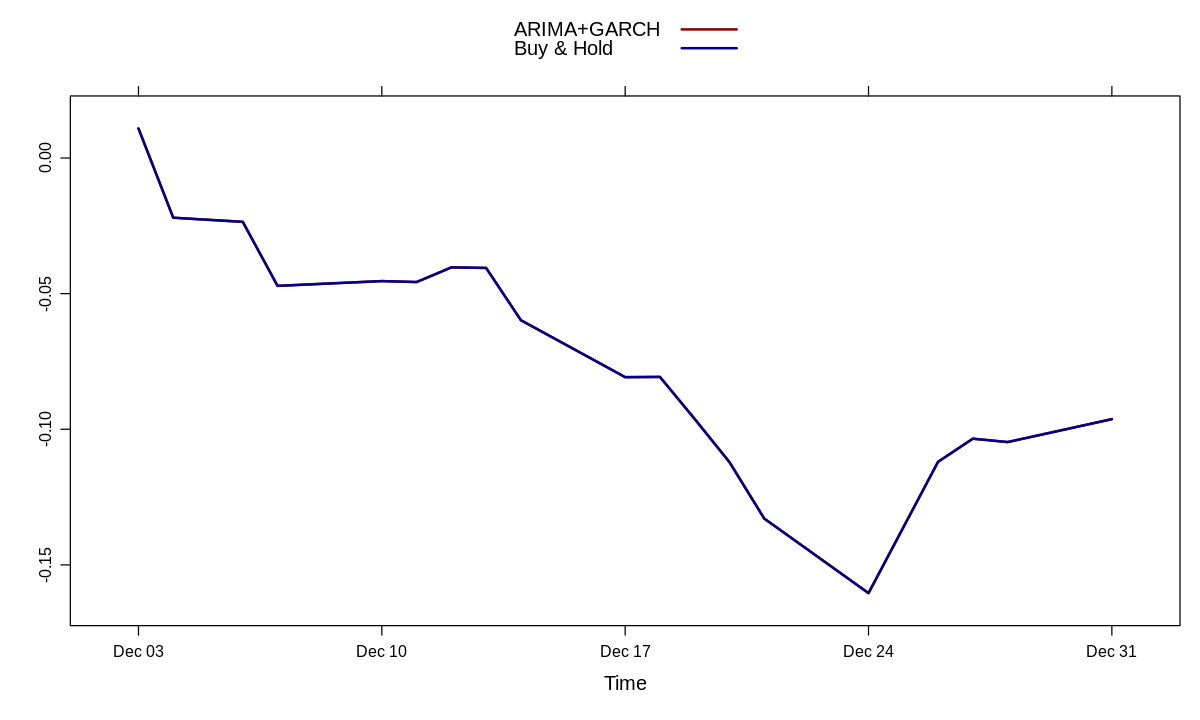

In [158]:
ag.backtest(pred[,1], ret, 1)

## Weekly Log Return

Obtain the S&P500 returns

In [7]:
start <- "1991-01-01"
end <- "2020-12-31"

getSymbols("^GSPC", from=start, to=end)

[1] "^GSPC"

In [9]:
lookahead <- 5

spReturns <- diff(log(Cl(GSPC)), lag=lookahead)

spReturns[as.character(head(index(Cl(GSPC)),lookahead))] = 0

length(spReturns)

[1] 7558

Set dates for fitting & backtesting

In [10]:
# for backtesting
#bt.start <- "2019-01-01"
#bt.end <- "2019-12-31"
#bt.start <- "2018-01-01"
#bt.end <- "2018-12-31"
bt.start <- "2018-12-01"
bt.end <- "2018-12-31"

YEAR <- 252
windowLength <- 5*YEAR # for fitting

# calc foreLength
ret <- window(spReturns, end=bt.end)
foreLength <- nrow(window(ret, start=bt.start)) 

# finalize data for fitting & backtesting
l <- nrow(ret)
ret <- ret[(l-windowLength-foreLength):l]

In [11]:
pred <- ag.forecast(ret, foreLength, windowLength, lookahead)

[1] "20 % done (41 secs)."
[1] "40 % done (1 mins)."
[1] "60 % done (2 mins)."
[1] "80 % done (3 mins)."
[1] "100 % done (3 mins)."


In [12]:
my.figsize(10,6)

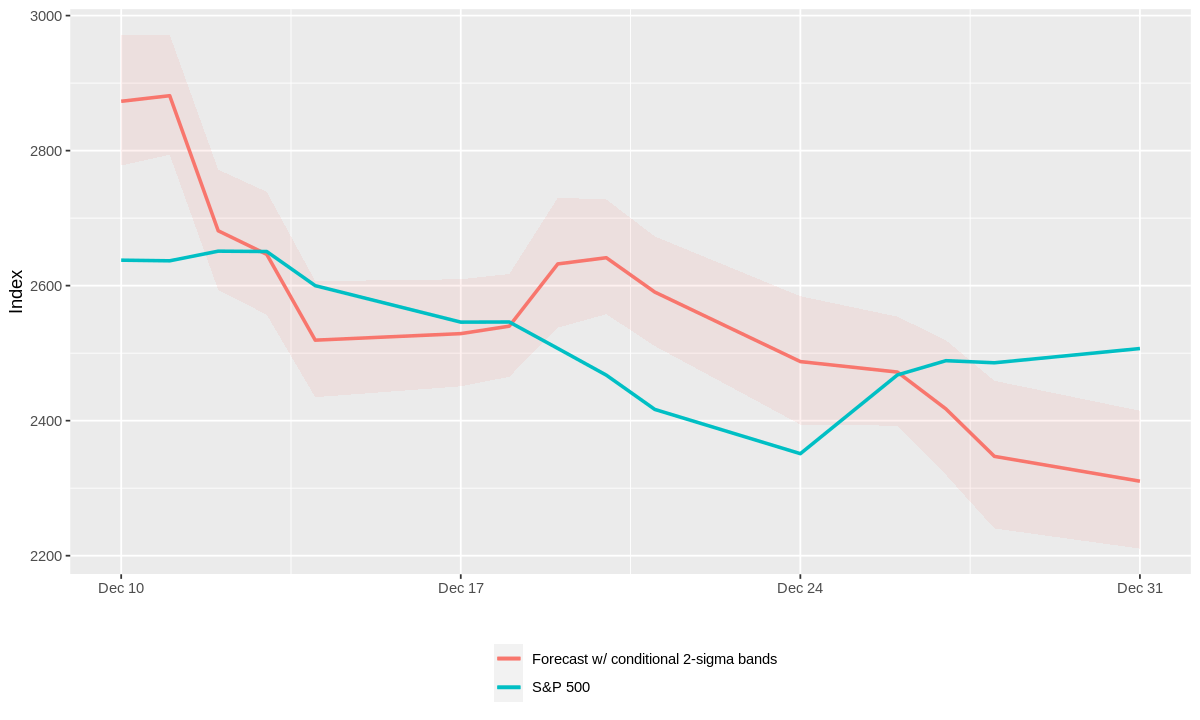

In [21]:
ag.plotforecast(pred, Cl(GSPC), lookahead)

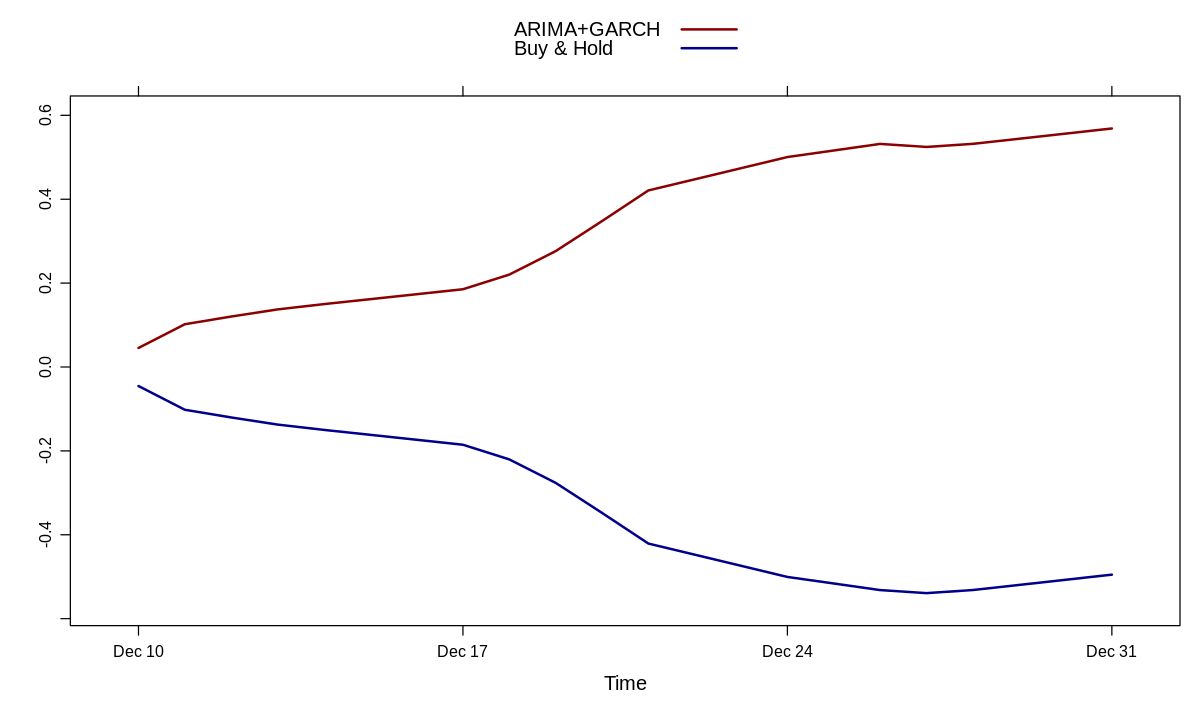

In [17]:
ag.backtest(pred[,1], ret, lookahead)